# 📊 Task 3: Customer Segmentation using Clustering  
## Data Analysis and Data Science using Python

---

## 🎯 Objective
The objective of this project is to perform **customer segmentation** using clustering techniques. Customers are grouped based on their purchasing behavior so that businesses can target each segment effectively.


Step 1: Import Required Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


Step 2: Load the Dataset

In [13]:
df = pd.read_csv("customer_data.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Step 3: Data Inspection

In [14]:
# Shape of dataset
df.shape

# Data types
df.dtypes

# Missing values
df.isnull().sum()

# Duplicate rows
df.duplicated().sum()

# Summary statistics
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Step 4: Feature Selection

The Customer ID column is excluded as it does not contribute to clustering.

In [15]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

Step 5: Data Standardization

Clustering algorithms are sensitive to feature scale, so standardization is required.

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Step 6: Elbow Method to Find Optimal Clusters

The Elbow Method helps identify the optimal number of clusters by plotting WCSS values.

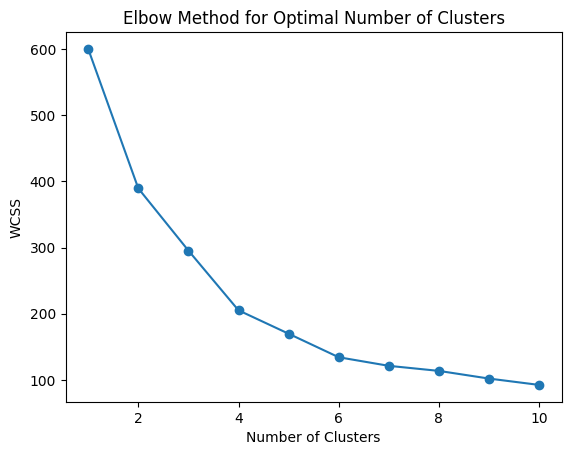

In [17]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


Step 7: Apply K-Means Clustering

Based on the elbow point, 5 clusters are selected.

In [18]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


Step 8: Dimensionality Reduction using PCA

PCA is used to reduce dimensions for visualization.

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]


Step 9: Cluster Visualization

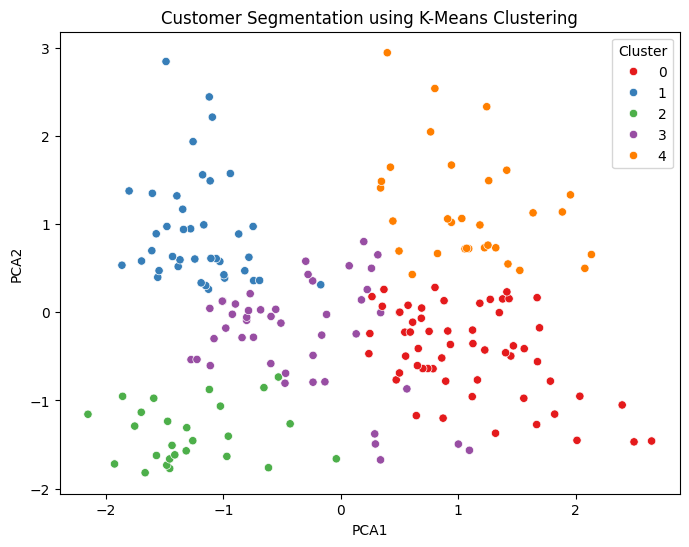

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title("Customer Segmentation using K-Means Clustering")
plt.show()


Step 10: Save the Clustered Dataset

In [21]:
df.to_csv("customer_segmented_data.csv", index=False)


Conclusion

Customer segmentation was successfully performed using K-Means clustering. After standardizing the data and identifying the optimal number of clusters, meaningful customer groups were formed. These insights can help businesses improve marketing strategies and customer engagement.

